In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade scipy
!pip install --upgrade joblib
!pip install --upgrade threadpoolctl
!python -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error




In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
#data processing
df['date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()

In [5]:
#feature engineering 
df.index = pd.to_datetime(df.index) 

df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['lag_1'] = df['Total Amount'].shift(1)
df['rolling_mean_7'] = df['Total Amount'].rolling(window=7).mean()
df.dropna(inplace=True)

#check processed dataset
print(df.head())


            Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                   
2023-01-02             421     CUST421  Female   37         Clothing   
2023-01-03             610     CUST610  Female   26           Beauty   
2023-01-04             683     CUST683    Male   38           Beauty   
2023-01-04             231     CUST231  Female   23         Clothing   
2023-01-04              32     CUST032    Male   30           Beauty   

            Quantity  Price per Unit  Total Amount       date  month  \
Date                                                                   
2023-01-02         3             500          1500 2023-01-02      1   
2023-01-03         2             300           600 2023-01-03      1   
2023-01-04         2             500          1000 2023-01-04      1   
2023-01-04         3              50           150 2023-01-04      1   
2023-01-04         3              30            90 2023-01-04  

RMSE: 527.0358312173231
MAE: 379.63919597989945


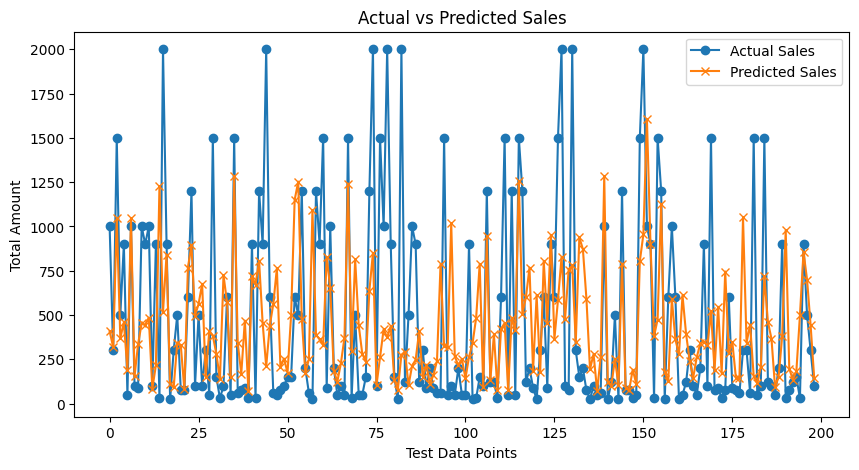

In [7]:
#model training : split data into features (x and traget (y))
X = df[['month', 'day_of_week', 'lag_1', 'rolling_mean_7']] #features
y = df['Total Amount'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model training : random forest reg
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5 # Root mean squared error
mae = mean_absolute_error(y_test, y_pred) # mean absolute error 

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Sales", marker='o')
plt.plot(y_pred, label="Predicted Sales", marker='x')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Test Data Points")
plt.ylabel("Total Amount")
plt.show()



In [9]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2]
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)
#best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

#evaluating model
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE after random search: {rmse}")
print(f"MAE after random searcg=h: {mae}")


RMSE after random search: 520.3176717724064
MAE after random searcg=h: 380.9411891627466


In [11]:
import joblib

#saving model
joblib.dump(best_model, 'sales_forecasting_model.pkl')


['sales_forecasting_model.pkl']

In [13]:
#loading the model
#model = joblib.load('sales_forecasting_model.pkl')

#make predictions
#future_sales = model.predict(new_data)

NameError: name 'new_data' is not defined

In [14]:
import streamlit as st

st.title('Sales Forecasting')
st.write("Enter the features of the product to forecast sales")

# Create input fields for model features
month = st.number_input('Month')
day_of_week = st.number_input('Day of the Week')
lag_1 = st.number_input('Lag 1 (Previous sales)')
rolling_mean_7 = st.number_input('7-day Rolling Mean of Sales')

# Predict sales
prediction = best_model.predict([[month, day_of_week, lag_1, rolling_mean_7]])
st.write(f"Predicted Sales: {prediction[0]}")


2025-01-02 11:51:52.519 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 11:51:52.768 
  command:

    streamlit run C:\Users\Ayaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-02 11:51:52.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 11:51:52.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 11:51:52.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 11:51:52.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 11:51:52.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-02 11:51: